## Introduction
Nowadays, people can access big data easily from open source databases. However, without proper data analysis, we cannot gather meaningful information from raw, and big data. Therefore, we need simple tools that people can easily load/gather data, remove redundant or missing data, perform analysis, and present data. 

In this tutorial, we will focus on how to use Python pandas to manage data. Moreover, we will walk through basic data analysis pipeline, including getting data, preparing data, analyzing data, and finally present data. 

### Tutorial Content
In this tutorial, we will show basic data analysis pipeline in Python, specifically using pandas. pandas is a powerful tool for analyzing time series data. For example, pandas suppports fast data access (SQL databased, xml, csv files). Furthermore, pandas supports easy data alignment, timezone handling, resampling / frequency conversion, and more. Due to its simplicity and powerfulness, pandas is greatly used in analyzing financial reports. 
                                                                                    
We will cover the following topics in this tutorial:
- [Installing the libraries](#Installing-the-libraries)
- [Loading data from different sources](#Loading-data-from-different-sources)
- [Analyzing data](#Analyzing-data)
- [Presenting data](#Presenting-data)

## Installing the libraries

Before getting started, you'll need to install the various libraries that we will use.  You can install using `pip`:

    $ pip install pandas
$ pip install pandas-datareader

During installation, if errors occur when importing matplotlib.pyplot, you can try updating python dateutil using: 
    
    $ sudo pip uninstall python-dateutil
$ sudo pip install python-dateutil==2.2

After installation, you should able to run the following commands:

In [55]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime
import sys
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows=10
pd.options.display.max_columns=8

In [56]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 2.7.10 (default, Jul 14 2015, 19:46:27) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.39)]
Pandas version 0.19.0
Matplotlib version 1.5.3


## Loading data from different sources

pandas supports different input sources, such as loading data from web, excel, or csv files. We will demonstrate how to get real financial data from Yahoo finance here.

In [57]:
# start and end time to indicate time range
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2015, 12, 31)
df = web.DataReader(["AMZN", "GOOGL", "FB"], 'yahoo', start, end)

In [58]:
# df is a 3 dimensional Panel structure
print df

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 252 (major_axis) x 3 (minor_axis)
Items axis: Open to Adj Close
Major_axis axis: 2015-01-02 00:00:00 to 2015-12-31 00:00:00
Minor_axis axis: AMZN to GOOGL


In [59]:
# we can access all GOOGL data using loc (indexing functions)
print df.loc[:,:,'GOOGL']

                  Open        High         Low       Close     Volume  \
Date                                                                    
2015-01-02  532.599976  535.799988  527.880005  529.549988  1324000.0   
2015-01-05  527.150024  527.989990  517.750000  519.460022  2059100.0   
2015-01-06  520.500000  521.210022  505.549988  506.640015  2722800.0   
2015-01-07  510.950012  511.489990  503.649994  505.149994  2345900.0   
2015-01-08  501.510010  507.500000  495.019989  506.910004  3652700.0   
...                ...         ...         ...         ...        ...   
2015-12-24  768.520020  769.200012  764.390015  765.840027   520600.0   
2015-12-28  770.000000  782.820007  767.729980  782.239990  1557800.0   
2015-12-29  786.989990  798.690002  786.200012  793.960022  1921500.0   
2015-12-30  793.960022  796.460022  787.200012  790.299988  1428300.0   
2015-12-31  787.820007  788.330017  777.320007  778.010010  1629300.0   

             Adj Close  
Date                    


In [60]:
# We can use loc to access certain column
df.loc['Open']
df.loc['Close']

,AMZN,FB,GOOGL
Date,,,
2015-01-02,308.519989,78.449997,529.549988
2015-01-05,302.190002,77.190002,519.460022
2015-01-06,295.290009,76.150002,506.640015
2015-01-07,298.420013,76.150002,505.149994
2015-01-08,300.459991,78.180000,506.910004
...,...,...,...
2015-12-24,662.789978,105.019997,765.840027
2015-12-28,675.200012,105.930000,782.239990
2015-12-29,693.969971,107.260002,793.960022


In [61]:
# Transform wide format into long (stacked) format as DataFrame whose columns are 
# the Panel’s items and whose index is a MultiIndex formed of the Panel’s major 
# and minor axes.
print df.to_frame()

                        Open        High         Low       Close      Volume  \
Date       minor                                                               
2015-01-02 AMZN   312.579987  314.750000  306.959991  308.519989   2783200.0   
           FB      78.580002   78.930000   77.699997   78.449997  18177500.0   
           GOOGL  532.599976  535.799988  527.880005  529.549988   1324000.0   
2015-01-05 AMZN   307.010010  308.380005  300.850006  302.190002   2774200.0   
           FB      77.980003   79.250000   76.860001   77.190002  26452200.0   
...                      ...         ...         ...         ...         ...   
2015-12-30 FB     107.000000  107.250000  106.059998  106.220001  13115000.0   
           GOOGL  793.960022  796.460022  787.200012  790.299988   1428300.0   
2015-12-31 AMZN   686.080017  687.750000  675.890015  675.890015   3718200.0   
           FB     106.000000  106.169998  104.620003  104.660004  18298700.0   
           GOOGL  787.820007  788.330017

In [62]:
df = df.to_frame()
# extract adj close, and volumne columns, and make them into one dataframe
df = df[['Adj Close','Volume']]
df.index.names=['date','stock']
df.columns = ['close','volume']
df.columns.names = ['field']
df = df.swaplevel('date','stock').sort_index()
print df

field                  close     volume
stock date                             
AMZN  2015-01-02  308.519989  2783200.0
      2015-01-05  302.190002  2774200.0
      2015-01-06  295.290009  3519000.0
      2015-01-07  298.420013  2640300.0
      2015-01-08  300.459991  3088400.0
...                      ...        ...
GOOGL 2015-12-24  765.840027   520600.0
      2015-12-28  782.239990  1557800.0
      2015-12-29  793.960022  1921500.0
      2015-12-30  790.299988  1428300.0
      2015-12-31  778.010010  1629300.0

[756 rows x 2 columns]


pandas also provides easy methods to save and read files. For example, we can save processed dataframe to xml files, and read them from files afterwards.

In [63]:
pct_change = df.groupby(level='stock').close.pct_change()
df = df.assign(ret=100 * pct_change)
df.to_excel('processed.xls')
df

field                  close     volume       ret
stock date                                       
AMZN  2015-01-02  308.519989  2783200.0       NaN
      2015-01-05  302.190002  2774200.0 -2.051727
      2015-01-06  295.290009  3519000.0 -2.283329
      2015-01-07  298.420013  2640300.0  1.059976
      2015-01-08  300.459991  3088400.0  0.683593
...                      ...        ...       ...
GOOGL 2015-12-24  765.840027   520600.0 -0.347423
      2015-12-28  782.239990  1557800.0  2.141435
      2015-12-29  793.960022  1921500.0  1.498266
      2015-12-30  790.299988  1428300.0 -0.460985
      2015-12-31  778.010010  1629300.0 -1.555103

[756 rows x 3 columns]

In real world, data can be messy with some missing fields as NaN. If we try to gather information from messy data, the conclusion will be biased, and also incorrect. Therefore, after gathering data we need, first step is to inspect the data, remove invalid data, and replcae them with proper values. Here we use an example to demonstrate how to find NaN values, and replace them to zeros.

In [64]:
import random
# randomly assign CDE ratings to each date of each stock
def create_data(stocks, start_date, end_dtate):
    dates = pd.date_range(start_date, end_date, freq='B')
    ratings = np.array(list('CDE'))
    l = []
    for s in stocks:
        rand_ratings = []
        for _ in range(0, len(dates)):
            rand_ratings.append(random.choice(ratings))
        l.append(pd.Series(rand_ratings,index=dates,name=s))
    return pd.concat(l,axis=1)

In the above codes, we create a dataframe with 10 randomly selected dates, and also randomly selected ratings.

In [65]:
start_date = '20150101'
end_date = '20151231'
ratings = create_data(['AMZN','GOOGL','FB'], start_date, end_date)
ratings.index.name = 'date'
# demonstrate how to save and load from files
ratings.to_excel('rating.xls')
read_ratings = pd.read_excel('rating.xls')
print ratings

           AMZN GOOGL FB
date                    
2015-01-01    C     C  D
2015-01-02    D     D  C
2015-01-05    E     C  E
2015-01-06    D     E  E
2015-01-07    C     D  C
...         ...   ... ..
2015-12-25    C     D  D
2015-12-28    D     C  C
2015-12-29    D     E  E
2015-12-30    D     D  E
2015-12-31    E     D  D

[261 rows x 3 columns]


We can use DataFrame.fillna() to fill NaN with specified methods. If the column type is numerical, then we can replace NaN with mean of non NaN values to better represent missing data.

In [66]:
ratings.fillna('C', inplace=True)
# in numerical cases, we can also replace NaN with average
# ratings.fillna(ratings.mean())
ratings

,AMZN,GOOGL,FB
date,,,
2015-01-01,C,C,D
2015-01-02,D,D,C
2015-01-05,E,C,E
2015-01-06,D,E,E
2015-01-07,C,D,C
...,...,...,...
2015-12-25,C,D,D
2015-12-28,D,C,C
2015-12-29,D,E,E


We can use stack function to pivot a level of the column labels, and return a dataframe with a single level of column labels.

In [67]:
stack_ratings = ratings.stack().to_frame('rating')
stack_ratings

rating
date                   
2015-01-01 AMZN       C
           GOOGL      C
           FB         D
2015-01-02 AMZN       D
           GOOGL      D
...                 ...
2015-12-30 GOOGL      D
           FB         E
2015-12-31 AMZN       E
           GOOGL      D
           FB         D

[783 rows x 1 columns]

In [68]:
ratings = stack_ratings
ratings.index.names = ['date','stock']
ratings = ratings.swaplevel('date','stock').sort_index()
ratings

rating
stock date             
AMZN  2015-01-01      C
      2015-01-02      D
      2015-01-05      E
      2015-01-06      D
      2015-01-07      C
...                 ...
GOOGL 2015-12-25      D
      2015-12-28      C
      2015-12-29      E
      2015-12-30      D
      2015-12-31      D

[783 rows x 1 columns]

We have two dataframes right now, respectively ratings and df. We would like to join two dataframes into one 
based on date and stock. There are four different types join methods, including left, right, inner, and outer. 
Here we want to preserve both columns from two tables. Therefore, we choose to use outer join.

In [69]:
# merge dataframes ratings and df into merged
ratings = ratings.reset_index()
df = df.reset_index()
merged = pd.merge(ratings,df,on=['date','stock'],how='outer').set_index(['stock','date'])
merged.to_excel('merged.xls')
merged

rating       close     volume       ret
stock date                                              
AMZN  2015-01-01      C         NaN        NaN       NaN
      2015-01-02      D  308.519989  2783200.0       NaN
      2015-01-05      E  302.190002  2774200.0 -2.051727
      2015-01-06      D  295.290009  3519000.0 -2.283329
      2015-01-07      C  298.420013  2640300.0  1.059976
...                 ...         ...        ...       ...
GOOGL 2015-12-25      D         NaN        NaN       NaN
      2015-12-28      C  782.239990  1557800.0  2.141435
      2015-12-29      E  793.960022  1921500.0  1.498266
      2015-12-30      D  790.299988  1428300.0 -0.460985
      2015-12-31      D  778.010010  1629300.0 -1.555103

[783 rows x 4 columns]

We can access index FB to see all rating, close, volumn, and ret.

In [70]:
merged.loc['FB']

,rating,close,volume,ret
date,,,,
2015-01-01,D,NaN,NaN,NaN
2015-01-02,C,78.449997,18177500.0,NaN
2015-01-05,E,77.190002,26452200.0,-1.606112
2015-01-06,E,76.150002,27399300.0,-1.347325
2015-01-07,C,76.150002,22045300.0,0.000000
...,...,...,...,...
2015-12-25,D,NaN,NaN,NaN
2015-12-28,C,105.930000,13069700.0,0.866505
2015-12-29,E,107.260002,17179900.0,1.255548


## Analyzing data

First of all, we can observe the closing prices over time for each stock. We can use pivot function to extract specific columns, and create pivot tables for these columns. In the following example, prices stands for the pivot table.

In [45]:
prices = merged.reset_index().pivot('date', 'stock', 'close')
prices

stock,AMZN,FB,GOOGL
date,,,
2015-01-01,NaN,NaN,NaN
2015-01-02,308.519989,78.449997,529.549988
2015-01-05,302.190002,77.190002,519.460022
2015-01-06,295.290009,76.150002,506.640015
2015-01-07,298.420013,76.150002,505.149994
...,...,...,...
2015-12-25,NaN,NaN,NaN
2015-12-28,675.200012,105.930000,782.239990
2015-12-29,693.969971,107.260002,793.960022


We can also visualize how prices change over time. In our example, Google stock prices outperform others, Facebook, 
and Amazon.

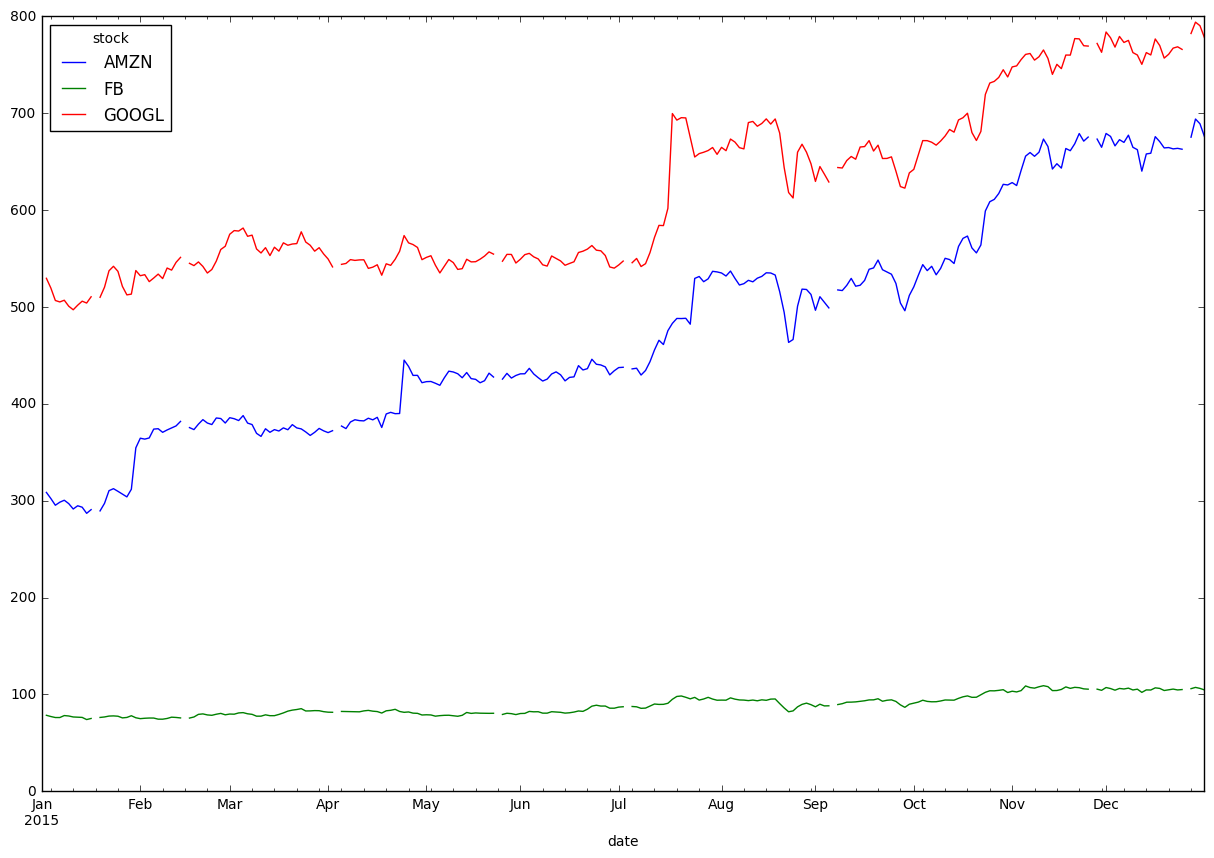

In [46]:
prices.plot.line(figsize=(15,10))

The ret column is calculated using daily percentage change by grouping stocks. Hight ret values stands for more growth
of the stock price.

In [71]:
rets = merged.reset_index().pivot('date','stock','ret')
rets

stock,AMZN,FB,GOOGL
date,,,
2015-01-01,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN
2015-01-05,-2.051727,-1.606112,-1.905385
2015-01-06,-2.283329,-1.347325,-2.467949
2015-01-07,1.059976,0.000000,-0.294099
...,...,...,...
2015-12-25,NaN,NaN,NaN
2015-12-28,1.872393,0.866505,2.141435
2015-12-29,2.779911,1.255548,1.498266


We can also visualize rets. However, we need to remove NaN values first. Otherwise, the figure will be misleading 
with incorrect values. As we can see from this figure, Amazon has the strongest grwoing power among these three. 
From rets and prices, we know that Google has the highest stock price while Amazon has the strongest growing strength.

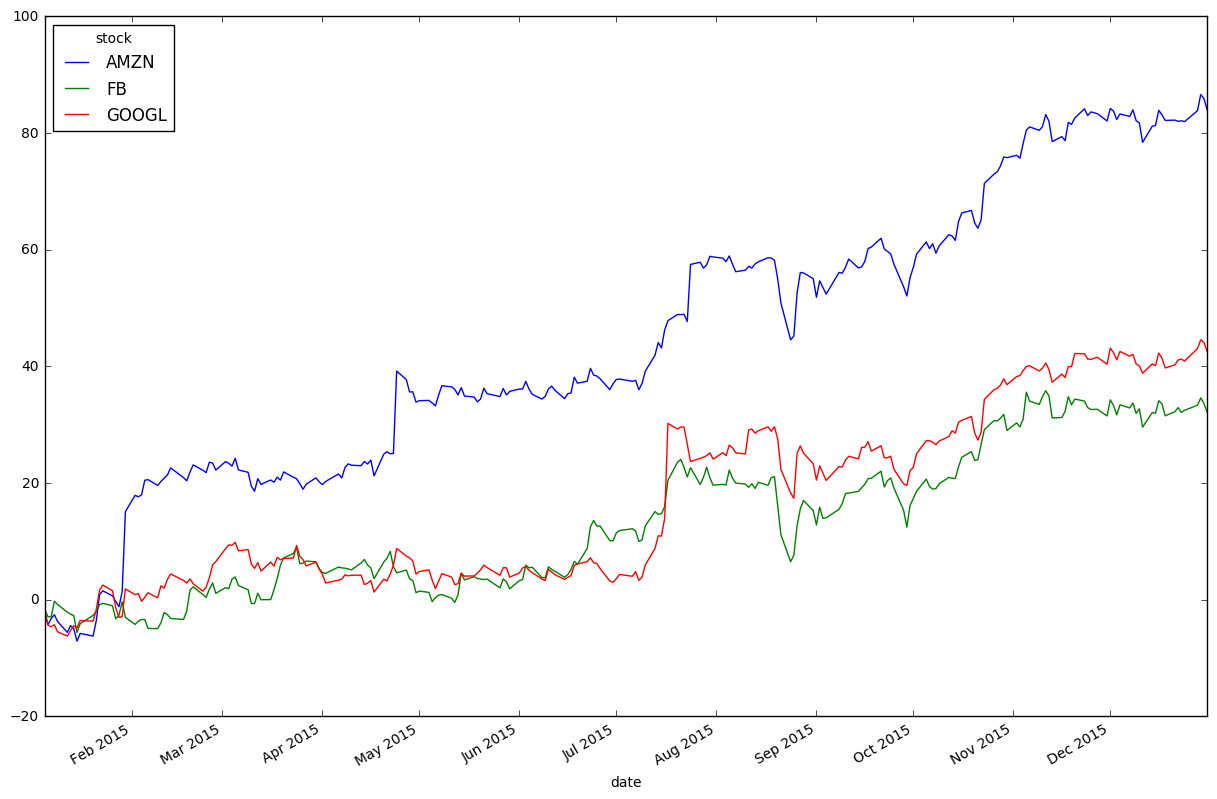

In [72]:
# drop NaN before plotting figures
rets = rets.dropna()
rets.cumsum().plot.line(figsize=(15,10))

pandas provides describe function to generate various summary statistics while excluding NaN values.

In [73]:
rets.describe()

stock,AMZN,FB,GOOGL
count,251.000000,251.000000,251.000000
mean,0.334500,0.127991,0.169343
std,2.118169,1.620556,1.821263
min,-6.289564,-4.983737,-5.217218
25%,-0.843238,-0.848059,-0.860561
50%,0.055326,0.086584,0.141074
75%,1.232531,1.175155,0.864249
max,14.131136,5.048195,16.258427


Now, we will use our fake data, also known as ratings to simulate investment. For stocks with rating A, we will invest 100 USD. For stocks with rating B, we will invest 50 dollats. As for C, D, and E, we will invest 0, -50, -100 dollars respectivelly. Therefore, we nned to replace values in ratings to numerical numbers from -100 to 100.

In [74]:
merged.rating.astype('category')
merged

rating       close     volume       ret
stock date                                              
AMZN  2015-01-01      C         NaN        NaN       NaN
      2015-01-02      D  308.519989  2783200.0       NaN
      2015-01-05      E  302.190002  2774200.0 -2.051727
      2015-01-06      D  295.290009  3519000.0 -2.283329
      2015-01-07      C  298.420013  2640300.0  1.059976
...                 ...         ...        ...       ...
GOOGL 2015-12-25      D         NaN        NaN       NaN
      2015-12-28      C  782.239990  1557800.0  2.141435
      2015-12-29      E  793.960022  1921500.0  1.498266
      2015-12-30      D  790.299988  1428300.0 -0.460985
      2015-12-31      D  778.010010  1629300.0 -1.555103

[783 rows x 4 columns]

In [75]:
# replace [C, D, E] to [0, 50, 100]
merged.rating = merged.rating.astype('category')
merged_invest = merged.rating.cat.rename_categories([0, 50, 100])
merged_invest

stock  date      
AMZN   2015-01-01      0
       2015-01-02     50
       2015-01-05    100
       2015-01-06     50
       2015-01-07      0
                    ... 
GOOGL  2015-12-25     50
       2015-12-28      0
       2015-12-29    100
       2015-12-30     50
       2015-12-31     50
dtype: category
Categories (3, int64): [0, 50, 100]

We create a new column called invest, calculated based on ratings of stocks. 

In [76]:
merged = merged.assign(invest=merged_invest)
merged

rating       close     volume       ret invest
stock date                                                     
AMZN  2015-01-01      C         NaN        NaN       NaN      0
      2015-01-02      D  308.519989  2783200.0       NaN     50
      2015-01-05      E  302.190002  2774200.0 -2.051727    100
      2015-01-06      D  295.290009  3519000.0 -2.283329     50
      2015-01-07      C  298.420013  2640300.0  1.059976      0
...                 ...         ...        ...       ...    ...
GOOGL 2015-12-25      D         NaN        NaN       NaN     50
      2015-12-28      C  782.239990  1557800.0  2.141435      0
      2015-12-29      E  793.960022  1921500.0  1.498266    100
      2015-12-30      D  790.299988  1428300.0 -0.460985     50
      2015-12-31      D  778.010010  1629300.0 -1.555103     50

[783 rows x 5 columns]

Since there are NaN in column ratings, we need to preprocess invest before we draw the figure. We can simply replace NaN values to category C, standing for no invest. Or we can drop all NaN values as next cell shows.

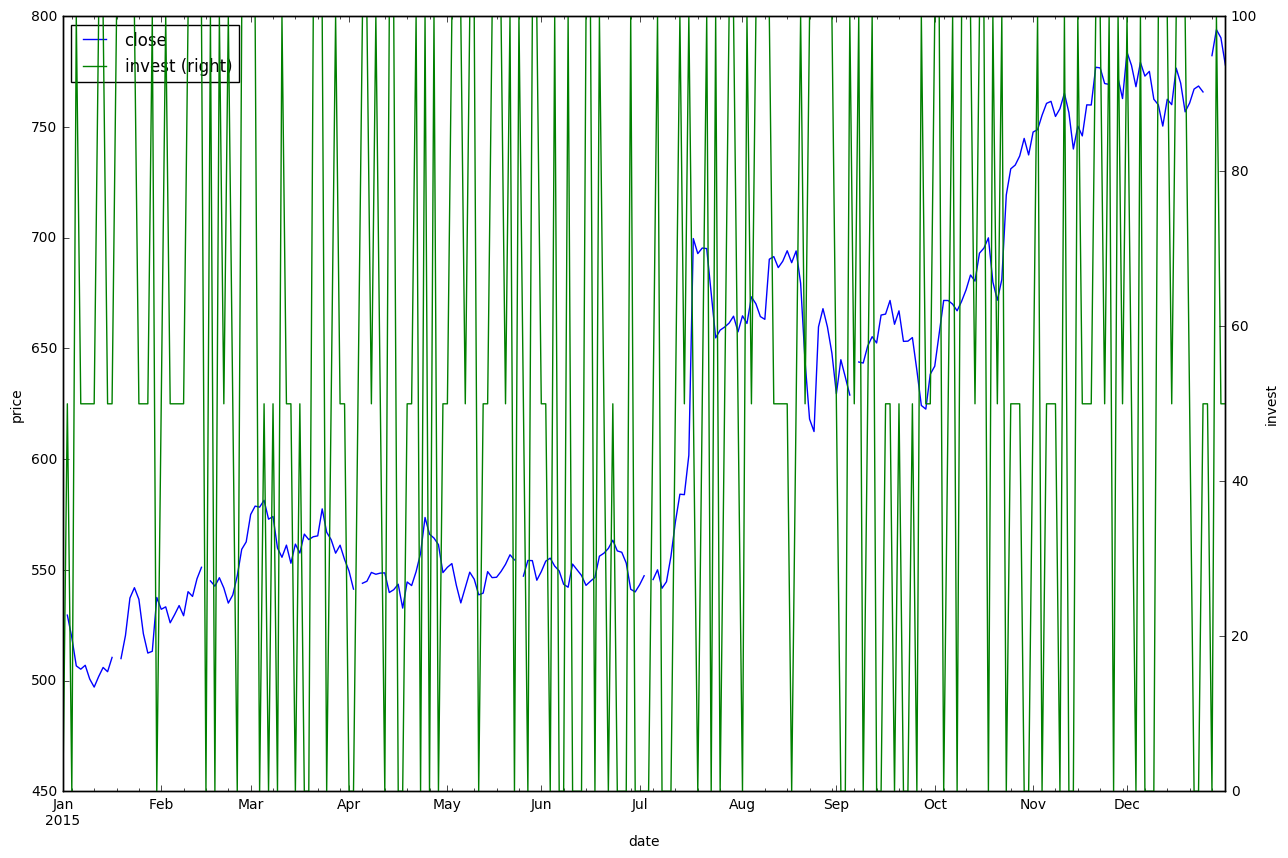

In [86]:
google = merged.loc['GOOGL']
google.close.plot.line(figsize=(15,10), legend=True).set_ylabel('price')
google_invest = google.invest.astype('float64')
google_invest.plot.line(secondary_y=True, legend=True).set_ylabel('invest')

## Presenting data

Finally, we will use the invest column to calculate profit we will get. Therefore, we can obtain a rough number of profit we will get if we invest money based on ratings of stocks. Note that, all ratings here are fake data.


Let invest column shift by one, so that we can multiply them by the ret column to get profit.

In [78]:
merged.loc['GOOGL']['invest'].dropna()

date
2015-01-01      0
2015-01-02     50
2015-01-05      0
2015-01-06    100
2015-01-07     50
             ... 
2015-12-25     50
2015-12-28      0
2015-12-29    100
2015-12-30     50
2015-12-31     50
Name: invest, dtype: category
Categories (3, int64): [0, 50, 100]

In [79]:
merged.loc['GOOGL']['invest'].shift(1).dropna()

date
2015-01-02      0
2015-01-05     50
2015-01-06      0
2015-01-07    100
2015-01-08     50
             ... 
2015-12-25     50
2015-12-28     50
2015-12-29      0
2015-12-30    100
2015-12-31     50
Name: invest, dtype: category
Categories (3, int64): [0, 50, 100]

In [87]:
pct_change = merged.groupby(level='stock').close.pct_change()
profit = merged.invest.shift(1) * pct_change
profit

stock  date      
AMZN   2015-01-01         NaN
       2015-01-02         NaN
       2015-01-05   -1.025863
       2015-01-06   -2.283329
       2015-01-07    0.529988
                       ...   
GOOGL  2015-12-25         NaN
       2015-12-28    1.070717
       2015-12-29    0.000000
       2015-12-30   -0.460985
       2015-12-31   -0.777551
dtype: float64

We create new columns profit, and cumulated profit in dataframe merged.

In [88]:
merged = merged.assign(profit=profit)
stock_groups = merged.groupby(level='stock')
cum_profit = stock_groups.profit.cumsum()
merged = merged.assign(cum_profit=cum_profit)
merged

rating       close     volume       ret invest    profit  \
stock date                                                                  
AMZN  2015-01-01      C         NaN        NaN       NaN      0       NaN   
      2015-01-02      D  308.519989  2783200.0       NaN     50       NaN   
      2015-01-05      E  302.190002  2774200.0 -2.051727    100 -1.025863   
      2015-01-06      D  295.290009  3519000.0 -2.283329     50 -2.283329   
      2015-01-07      C  298.420013  2640300.0  1.059976      0  0.529988   
...                 ...         ...        ...       ...    ...       ...   
GOOGL 2015-12-25      D         NaN        NaN       NaN     50       NaN   
      2015-12-28      C  782.239990  1557800.0  2.141435      0  1.070717   
      2015-12-29      E  793.960022  1921500.0  1.498266    100  0.000000   
      2015-12-30      D  790.299988  1428300.0 -0.460985     50 -0.460985   
      2015-12-31      D  778.010010  1629300.0 -1.555103     50 -0.777551   

                  cum_profit  
stock date                    
AMZN  2015-01-01         NaN  
      2015-01-02         NaN  
      2015-01-05   -1.025863  
      2015-01-06   -3.309193  
      2015-01-07   -2.779205  
...                      ...  
GOOGL 2015-12-25         NaN  
      2015-12-28   39.855230  
      2015-12-29   39.855230  
      2015-12-30   39.394245  
      2015-12-31   38.616694  

[783 rows x 7 columns]

Based on the profit we derived, we can see the total profit of stocks by using sum function. Note that the rating column is created by using create_data function with random variables inside. Therefore, the total profit will vary each time as there exists random variables when creating ratings. The non deterministic characteristics also exist in cum_proft.

In [89]:
stock_groups = merged.groupby(level='stock')
total_profit = stock_groups.profit
print total_profit.sum()

stock
AMZN     35.854133
FB        1.542645
GOOGL    38.616694
Name: profit, dtype: float64


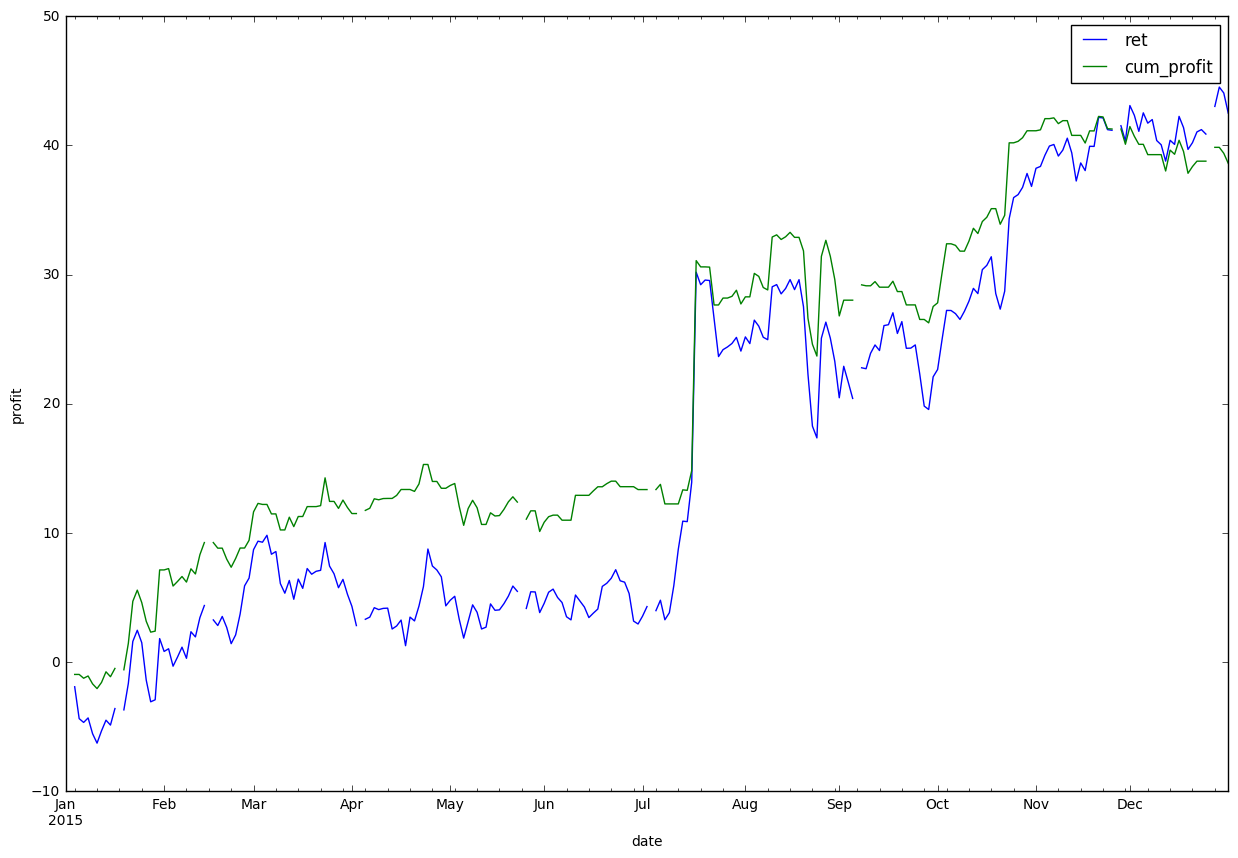

In [83]:
google = merged.loc['GOOGL']
cum_ret = google.ret.cumsum()
cum_ret.plot.line(figsize=(15,10), legend=True).set_ylabel('profit')
cum_profit = google.cum_profit
cum_profit.plot.line(legend=True)

## Summary and References
This tutorial introduces simple data analyzing pipeline using pandas. We use real financial data from Yahoo finance, and perform simple data preprocessing. The pipleline could be summarized as getting data, preprocessing data, analyzing data, and finally present data. In preprocessing stage, we remove redundant data, and replace them with resonable values (such as average). Then, we organize data by keeping columns that will be used in analysis.

You can visit the following links for more details about the libraries, and examples.
1. pandas document: http://pandas.pydata.org/
2. pandas datareader: http://pandas-datareader.readthedocs.io/en/latest/index.html
3. pandas slides: www.slideshare.net/continuumio/data-pandas-profit
